## Content 

A tax is a compulsory financial charge or some other type of levy imposed on a taxpayer (an individual or legal entity) by a governmental organization in order to fund government spending and various public expenditures.

## Objective

You are required to build a machine learning model that would predict the political party to which a taxpayer belongs to.

## About Data

The dataset contains information about US taxpayers. There are 10 independent columns and 1 dependent column. This dataset includes attributes like household income, household debt level, if the taxpayer is married or not, how many cars their household has, if they filed their taxes in the last three years or not.

## Data Description

 - HHI: Household income
 - HHDL: Household debt level
 - Married: There are three categories for a taxpayer 0, 1, 2 with regards to marriage.
 - PoliticalParty: Name of the political party
 - CollegeGrads: Grade in College out of 5
 - AHHAge: Average household age
 - cars: number of cars in house
 - Filed in YYYY: Tax filed in given year YYYY

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

tax_data = pd.read_csv("https://raw.githubusercontent.com/dphi-official/Datasets/master/tax_payers/train_set_label.csv" )
tax_data

,Unnamed: 0,HHI,HHDL,Married,CollegGrads,AHHAge,Cars,Filed in 2017,Filed in 2016,Filed in 2015,PoliticalParty
0,61,183414,-12402,1,2,28,1,0,0,1,Democrat
1,501,129786,700251,2,5,63,3,0,0,0,Republican
2,658,268343,493411,2,4,44,1,1,0,1,Independent
3,703,290506,-433408,1,1,28,5,1,0,1,Republican
4,702,90108,907135,1,3,57,5,1,1,0,Democrat
...,...,...,...,...,...,...,...,...,...,...,...
798,476,153304,971909,0,1,99,5,1,0,0,Democrat
799,657,136652,-184616,1,2,31,3,1,0,0,Democrat
800,596,51066,-900262,1,1,67,4,0,0,0,Democrat
801,561,123721,-51448,2,0,23,4,0,1,1,Republican


In [4]:
tax_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 803 entries, 0 to 802
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      803 non-null    int64 
 1   HHI             803 non-null    int64 
 2   HHDL            803 non-null    int64 
 3   Married         803 non-null    int64 
 4   CollegGrads     803 non-null    int64 
 5   AHHAge          803 non-null    int64 
 6   Cars            803 non-null    int64 
 7   Filed in 2017   803 non-null    int64 
 8   Filed in 2016   803 non-null    int64 
 9   Filed in 2015   803 non-null    int64 
 10  PoliticalParty  803 non-null    object
dtypes: int64(10), object(1)
memory usage: 69.1+ KB


There are  no missing values. Converting Married, Filed In year column varaiables into categorical variables

In [5]:
tax_data.PoliticalParty.value_counts()

Democrat       269
Independent    269
Republican     265
Name: PoliticalParty, dtype: int64

By observing above data we can tell that Republican Party has less number of taxpayers compared to others.
We need the data of tax filings in the given data which helps us in predicting our result.

In [6]:
tax_data.groupby("PoliticalParty").sum()

,Unnamed: 0,HHI,HHDL,Married,CollegGrads,AHHAge,Cars,Filed in 2017,Filed in 2016,Filed in 2015
PoliticalParty,,,,,,,,,,
Democrat,138095,39207768,-3973161,251,714,15937,636,125,138,125
Independent,129216,42692746,-6328472,262,689,16390,638,135,142,153
Republican,135989,42887845,-2025423,267,691,16302,682,147,129,137


From the above data we can infer that the total people who filed their tax in 2015 is more than the people who filed tax in other two years comparitively.

/home/jaideep03/notebook/jupyterenv/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Scatterplot between HHI and HHDL')

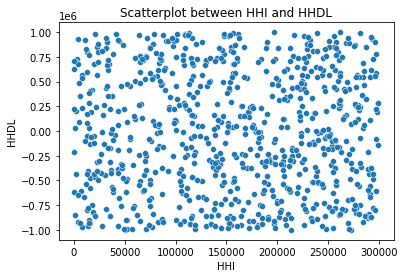

In [40]:
import seaborn as sns

plt.figure
sns.scatterplot(tax_data.HHI, tax_data.HHDL)
plt.xlabel("HHI")
plt.ylabel("HHDL")
plt.title("Scatterplot between HHI and HHDL")

In [43]:
# Converting Married, Filed In year column varaiables into categorical variables

tax_data["Married"] = tax_data.Married.astype('object')
tax_data["Filed in 2015"] = tax_data['Filed in 2015'].astype('object')
tax_data["Filed in 2016"] = tax_data['Filed in 2016'].astype('object')
tax_data["Filed in 2017"] = tax_data['Filed in 2017'].astype('object')

tax_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 803 entries, 0 to 802
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      803 non-null    int64 
 1   HHI             803 non-null    int64 
 2   HHDL            803 non-null    int64 
 3   Married         803 non-null    object
 4   CollegGrads     803 non-null    int64 
 5   AHHAge          803 non-null    int64 
 6   Cars            803 non-null    int64 
 7   Filed in 2017   803 non-null    object
 8   Filed in 2016   803 non-null    object
 9   Filed in 2015   803 non-null    object
 10  PoliticalParty  803 non-null    object
dtypes: int64(6), object(5)
memory usage: 69.1+ KB


In [47]:
# Creating dummy variables

new_tax_data = pd.get_dummies(tax_data, columns = ["Married", "Filed in 2017", "Filed in 2016", "Filed in 2015"])

new_tax_data.head()

/home/jaideep03/notebook/jupyterenv/lib/python3.10/site-packages/pandas/core/algorithms.py:798: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  uniques = Index(uniques)


,Unnamed: 0,HHI,HHDL,CollegGrads,AHHAge,Cars,PoliticalParty,Married_0,Married_1,Married_2,Filed in 2017_0,Filed in 2017_1,Filed in 2016_0,Filed in 2016_1,Filed in 2015_0,Filed in 2015_1
0,61,183414,-12402,2,28,1,Democrat,0,1,0,1,0,1,0,0,1
1,501,129786,700251,5,63,3,Republican,0,0,1,1,0,1,0,1,0
2,658,268343,493411,4,44,1,Independent,0,0,1,0,1,1,0,0,1
3,703,290506,-433408,1,28,5,Republican,0,1,0,0,1,1,0,0,1
4,702,90108,907135,3,57,5,Democrat,0,1,0,0,1,0,1,1,0


In [50]:
new_tax_data.describe()

,Unnamed: 0,HHI,HHDL,CollegGrads,AHHAge,Cars,Married_0,Married_1,Married_2,Filed in 2017_0,Filed in 2017_1,Filed in 2016_0,Filed in 2016_1,Filed in 2015_0,Filed in 2015_1
count,803.000000,803.000000,803.000000,803.000000,803.000000,803.000000,803.000000,803.000000,803.000000,803.000000,803.000000,803.000000,803.000000,803.000000,803.000000
mean,502.241594,155402.688667,-15351.252802,2.607721,60.559153,2.435866,0.337484,0.353674,0.308842,0.493151,0.506849,0.490660,0.509340,0.483188,0.516812
std,288.460068,86788.153213,595184.302049,1.675492,25.071219,1.703542,0.473146,0.478407,0.462304,0.500265,0.500265,0.500224,0.500224,0.500029,0.500029
min,1.000000,185.000000,-999994.000000,0.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,254.500000,82373.000000,-516765.000000,1.000000,38.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,501.000000,156542.000000,-24440.000000,3.000000,60.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000
75%,754.500000,230772.000000,518135.500000,4.000000,82.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1004.000000,299374.000000,999628.000000,5.000000,105.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Now we need to differentiate independent veriables from dependent

In [51]:
x = new_tax_data.drop(["Unnamed: 0", "PoliticalParty"], axis = 1)
y = new_tax_data[["PoliticalParty"]]

In [54]:
# Splitting into training and testing data set
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 2)

print("Shape of original data:", new_tax_data.shape)
print("Shape of training data:", x_train.shape)
print("Shape of testing data:", x_test.shape)

Shape of original data: (803, 16)
Shape of training data: (642, 14)
Shape of testing data: (161, 14)


We generally know that Random Forest has high accuracy in many cases. So using that classification model.

In [55]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=2)
rf.fit(x_train, y_train)
preds_rf = rf.predict(x_test)

/tmp/ipykernel_40199/3134424998.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_train, y_train)


## Test Data

In [57]:
test_data = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/tax_payers/test_set_label.csv')
test_data

,Unnamed: 0,HHI,HHDL,Married,CollegGrads,AHHAge,Cars,Filed in 2017,Filed in 2016,Filed in 2015
0,17,253274,-633752,2,1,94,3,0,1,1
1,590,47107,322850,0,1,30,2,1,1,0
2,224,111874,300583,0,2,46,3,0,1,1
3,960,96670,107419,0,3,77,5,0,0,0
4,57,128669,341273,0,0,92,4,1,1,1
...,...,...,...,...,...,...,...,...,...,...
196,51,138204,144986,1,1,63,1,1,1,0
197,705,73250,-810927,0,5,40,1,1,0,1
198,542,134376,352116,0,2,86,1,1,0,0
199,929,70820,260337,0,3,78,3,1,0,1


In [58]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Unnamed: 0     201 non-null    int64
 1   HHI            201 non-null    int64
 2   HHDL           201 non-null    int64
 3   Married        201 non-null    int64
 4   CollegGrads    201 non-null    int64
 5   AHHAge         201 non-null    int64
 6   Cars           201 non-null    int64
 7   Filed in 2017  201 non-null    int64
 8   Filed in 2016  201 non-null    int64
 9   Filed in 2015  201 non-null    int64
dtypes: int64(10)
memory usage: 15.8 KB


In [59]:
# Similarly converting same four variables mentioned categorical variables
test_data["Married"] = test_data.Married.astype("object")
test_data["Filed in 2017"] = test_data["Filed in 2017"].astype("object")
test_data["Filed in 2016"] = test_data["Filed in 2016"].astype("object")
test_data["Filed in 2015"] = test_data["Filed in 2015"].astype("object")

In [61]:
new_test_data = pd.get_dummies(test_data, columns = ["Married", "Filed in 2017", "Filed in 2016", "Filed in 2015"])
new_test_data = new_test_data.drop("Unnamed: 0", axis=1)
new_test_data

/home/jaideep03/notebook/jupyterenv/lib/python3.10/site-packages/pandas/core/algorithms.py:798: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  uniques = Index(uniques)


,HHI,HHDL,CollegGrads,AHHAge,Cars,Married_0,Married_1,Married_2,Filed in 2017_0,Filed in 2017_1,Filed in 2016_0,Filed in 2016_1,Filed in 2015_0,Filed in 2015_1
0,253274,-633752,1,94,3,0,0,1,1,0,0,1,0,1
1,47107,322850,1,30,2,1,0,0,0,1,0,1,1,0
2,111874,300583,2,46,3,1,0,0,1,0,0,1,0,1
3,96670,107419,3,77,5,1,0,0,1,0,1,0,1,0
4,128669,341273,0,92,4,1,0,0,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,138204,144986,1,63,1,0,1,0,0,1,0,1,1,0
197,73250,-810927,5,40,1,1,0,0,0,1,1,0,0,1
198,134376,352116,2,86,1,1,0,0,0,1,1,0,1,0
199,70820,260337,3,78,3,1,0,0,0,1,1,0,0,1


In [65]:
target = rf.predict(new_test_data)
result = pd.DataFrame(target)
result.index = new_test_data.index
result.columns = ["prediction"]
result.to_csv("Final_Predictions.csv", index = False)